In [4]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

**Part 1 - Personal Finance Planner**

---

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
requests.get(btc_url) 
requests.get(eth_url) 

<Response [200]>

In [9]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url) 
response_data_btc
response_content_btc = response_data_btc.content
import json
btc_data = response_data_btc.json()
print(json.dumps(btc_data, indent=4)) 

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18560162,
            "total_supply": 18560162,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 19008.96,
                    "volume_24h": 32464386455,
                    "market_cap": 355322998731,
                    "percentage_change_1h": -0.620843361046353,
                    "percentage_change_24h": 0.301571183819836,
                    "percentage_change_7d": -0.432483223332428,
                    "percent_change_1h": -0.620843361046353,
                    "percent_change_24h": 0.301571183819836,
                    "percent_change_7d": -0.432483223332428
                },
                "CAD": {
                    "price": 24608.999616,
                    "volume_24h": 42028394704.643,
             

In [10]:
# Fetch current ETH price
response_data_eth = requests.get(eth_url) 
response_data_eth
response_content_eth = response_data_eth.content
import json
eth_data = response_data_eth.json()
print(json.dumps(eth_data, indent=4)) 

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113667320,
            "total_supply": 113667320,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 593.5,
                    "volume_24h": 17573680630,
                    "market_cap": 67701986244,
                    "percentage_change_1h": -0.516815832031861,
                    "percentage_change_24h": 0.361596427019517,
                    "percentage_change_7d": -1.52141134870409,
                    "percent_change_1h": -0.516815832031861,
                    "percent_change_24h": 0.361596427019517,
                    "percent_change_7d": -1.52141134870409
                },
                "CAD": {
                    "price": 768.3451,
                    "volume_24h": 22750886943.598,
                    

In [11]:
# Compute current value of my crpto
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

In [12]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $22810.75
The current value of your 5.3 ETH is $3145.55


In [13]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [15]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-12-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
current_portfolio = alpaca.get_barset( tickers, timeframe, start=current_date, end=current_date,).df

# Preview DataFrame
current_portfolio.head()

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2020-12-01 00:00:00-05:00  118.03  118.1  117.73  117.84  4308362  365.57   

                                                             
                             high     low   close    volume  
time                                                         
2020-12-01 00:00:00-05:00  367.68  364.93  365.97  64527332

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(current_portfolio["AGG"]["close"])
spy_close_price = float(current_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.84
Current SPY closing price: $365.97


In [17]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18298.50
The current value of your 200 AGG shares is $23568.00


**Savings Health Analysis**

---

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
amount_data = {"amount": [total_crypto, total_shares_value]}
df_savings = pd.DataFrame(amount_data, index =["crypto", "shares"]) 
# Display savings DataFrame
display(df_savings)

,amount
crypto,25956.302
shares,41866.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

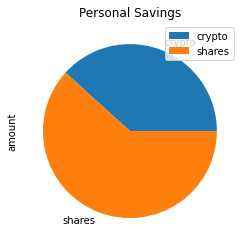

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_amount:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_amount:
        print("Congratulations! You have reached your financial goal")
else:
        print(f"You are {emergency_fund - total_amount} dollars away from reaching your financial goal")

Congratuations! You have enough money in your emergency fund.


**Part 2 - Retirement Planning**

---

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809  209.44   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790  210.61   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029  208.83   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997  206.08   
2015-12-07 00:00:00-05:00  108.30  108.5800  108.23  108.41  1939914  209.22   

                                                                
                             high       low   close     volume  
time                                                            
2015-12-01 00:00:00-05:00  210.82  209.1100  210.74   80426519  
2015-12-02 00:00:00-05:00  211.00  208.2300  208.50   88408000  
2015-12-03 00:00:00-05:00  209.15  204.7511  205.60  125709867  
2015-12-04 00:00:00-05:00  209.97  205.9300  209.63  138261490  
2015-12-07 00:00:00-05:00  209.25  207.2000  208.29   80571904

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [24]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.5800  108.23  108.41  1939914   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-12-01 00:00:00-05:00          NaN  209.44  210.82  209.1100  210.74   
2015-12-02 00:00:00-05:00    -0.001378  210.61  211.00  208.2300  208.50   
2015-12-03 00:00:00-05:00    -0.007360  208.83  209.15  204.7511  205.60   
2015-12-04 00:00:00-05:00     0.003244  206.08  209.97  205.9300  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.2000  208.29   

                                                   
                              volume daily_return  
time                                               
2015-12-01 00:00:00-05:00   80426519          NaN  
2015-12-02 00:00:00-05:00   88408000    -0.010629  
2015-12-03 00:00:00-05:00  125709867    -0.013909  
2015-12-04 00:00:00-05:00  138261490     0.019601  
2015-12-07 00:00:00-05:00   80571904    -0.006392

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997479,1.006092,0.996798,1.006488,1.001354,0.982245,1.008481,0.986394,1.010393,0.994144,...,1.002617,1.005416,0.994437,1.004376,1.002899,1.008024,1.003273,1.009351,1.013835,1.013136
2,0.992640,0.989988,0.994762,1.008930,1.013751,0.996968,1.009491,0.998182,1.007706,0.993493,...,0.988198,0.999939,0.987139,1.006888,0.987967,0.989026,1.004057,1.016263,1.008790,1.021022
3,0.994567,0.995164,1.007525,1.004599,1.011834,0.998844,1.024944,0.993590,1.007077,0.998624,...,0.985323,0.995499,0.995221,1.007545,0.982806,0.995419,0.998903,1.016288,1.014934,1.010212
4,1.007323,1.003567,0.994087,1.001287,1.023291,0.999190,1.020862,1.006086,1.000304,0.989040,...,0.989837,0.993973,1.005001,1.013065,0.985995,0.982026,0.998577,1.012057,1.005533,1.014203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.633779,23.246983,9.351269,20.301272,7.681755,12.102069,29.618313,5.386852,12.486968,5.371983,...,19.437525,8.167785,54.104632,15.531769,21.363450,6.386715,39.545666,6.055982,14.547426,26.439064
7557,14.534624,23.262444,9.436061,20.109688,7.699778,12.083864,29.829496,5.438167,12.507108,5.389252,...,19.757331,8.138901,54.087318,15.432840,21.459089,6.335566,39.459333,6.074712,14.493158,26.398692
7558,14.525451,23.299240,9.475531,19.742450,7.684159,12.007107,29.816290,5.438796,12.518573,5.412591,...,19.664299,8.170816,54.349931,15.345640,21.260090,6.395366,39.620923,6.072733,14.552612,26.448994
7559,14.430320,23.421430,9.488024,19.905791,7.688087,12.022907,29.638822,5.354335,12.596822,5.402902,...,19.609712,8.086999,53.762130,15.359118,21.322626,6.333768,39.395347,6.129236,14.528516,26.502866


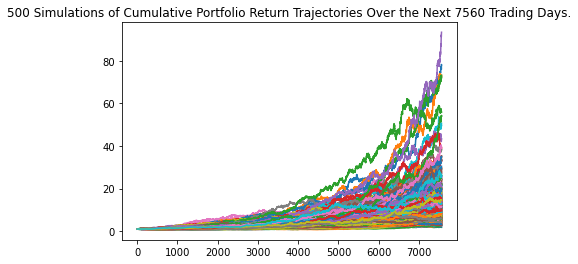

In [26]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")

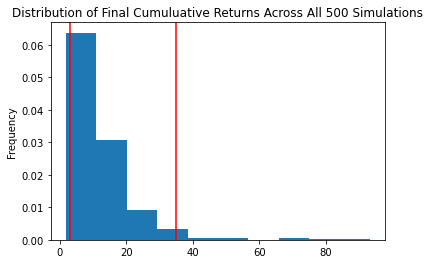

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

**Retirement Analysis**

---

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.426887
std               9.912171
min               1.827405
25%               6.601977
50%               9.605127
75%              15.241912
max              93.376666
95% CI Lower      3.217919
95% CI Upper     35.039355
Name: 7560, dtype: float64


***Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.***

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $64358.39 and $700787.09


***Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.***

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $96537.58 and $1051180.64


**Optional Challenge - Early Retirement**

---

***Five Years Retirement Option***

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_five_year.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.5800  108.23  108.41  1939914   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-12-01 00:00:00-05:00          NaN  209.44  210.82  209.1100  210.74   
2015-12-02 00:00:00-05:00    -0.001378  210.61  211.00  208.2300  208.50   
2015-12-03 00:00:00-05:00    -0.007360  208.83  209.15  204.7511  205.60   
2015-12-04 00:00:00-05:00     0.003244  206.08  209.97  205.9300  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.2000  208.29   

                                                   
                              volume daily_return  
time                                               
2015-12-01 00:00:00-05:00   80426519          NaN  
2015-12-02 00:00:00-05:00   88408000    -0.010629  
2015-12-03 00:00:00-05:00  125709867    -0.013909  
2015-12-04 00:00:00-05:00  138261490     0.019601  
2015-12-07 00:00:00-05:00   80571904    -0.006392

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.984731,0.994660,1.011150,1.014713,1.012887,1.003015,0.997082,1.007847,0.999573,0.993369,...,1.009552,1.017219,1.006072,1.001849,1.013439,0.998732,1.002608,0.995793,0.998182,1.004917
2,0.986428,0.990249,1.019301,1.030029,1.026376,1.005196,0.989142,1.018937,1.006544,0.993423,...,1.020779,1.004318,1.017316,1.003526,1.023502,0.997208,1.006602,0.994147,0.997990,0.982965
3,0.982515,0.988664,1.020383,1.037086,1.036559,1.008507,1.007954,1.012223,1.004569,0.989091,...,1.016752,0.999336,1.010496,0.996791,1.029248,0.982506,1.012254,1.003319,1.000449,0.976889
4,0.984176,0.998124,1.009902,1.034224,1.024600,1.006203,1.013725,1.016228,1.006757,0.979051,...,1.025173,0.994813,1.011812,0.990663,1.038472,0.978904,1.012016,1.001214,1.006652,0.982954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.095753,1.079679,1.015846,1.319478,1.030537,1.268634,1.048880,1.644080,2.864011,2.094241,...,2.001172,0.853412,2.331045,2.104162,1.705163,2.026991,0.831718,1.575572,2.346353,1.101927
1257,1.092810,1.087569,1.024492,1.314353,1.026175,1.271922,1.045998,1.635907,2.881957,2.083280,...,1.997721,0.853518,2.305976,2.126349,1.708216,2.031675,0.838568,1.573359,2.355371,1.109114
1258,1.103964,1.074348,1.019644,1.328918,1.040646,1.266723,1.044522,1.629740,2.893320,2.067104,...,2.007899,0.845159,2.320476,2.140990,1.705782,2.048701,0.838761,1.569795,2.362240,1.099393
1259,1.114871,1.086336,1.007620,1.324171,1.028309,1.273801,1.037091,1.630309,2.897458,2.037507,...,1.997909,0.840990,2.331615,2.143679,1.692991,2.044174,0.843408,1.573521,2.359686,1.103777


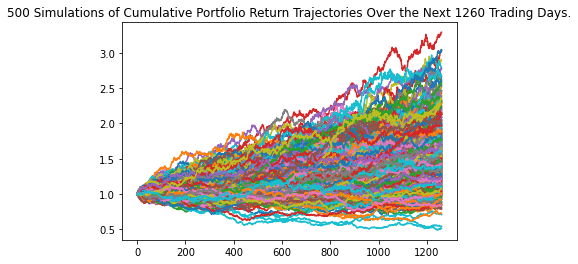

In [34]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches="tight")

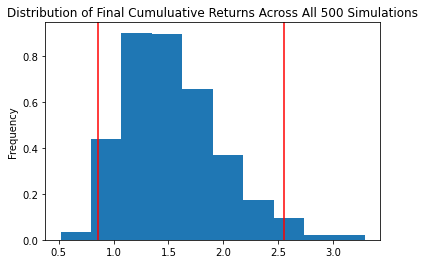

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_1 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_1)

count           500.000000
mean              1.534517
std               0.441293
min               0.516146
25%               1.220159
50%               1.470134
75%               1.797507
max               3.292050
95% CI Lower      0.853521
95% CI Upper      2.551411
Name: 1260, dtype: float64


In [40]:
# Set initial investment
initial_investment_1 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_1} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $193075.16 and $2102361.28


***Ten Years Retirement Option***



In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_ten_year.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.5800  108.23  108.41  1939914   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-12-01 00:00:00-05:00          NaN  209.44  210.82  209.1100  210.74   
2015-12-02 00:00:00-05:00    -0.001378  210.61  211.00  208.2300  208.50   
2015-12-03 00:00:00-05:00    -0.007360  208.83  209.15  204.7511  205.60   
2015-12-04 00:00:00-05:00     0.003244  206.08  209.97  205.9300  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.2000  208.29   

                                                   
                              volume daily_return  
time                                               
2015-12-01 00:00:00-05:00   80426519          NaN  
2015-12-02 00:00:00-05:00   88408000    -0.010629  
2015-12-03 00:00:00-05:00  125709867    -0.013909  
2015-12-04 00:00:00-05:00  138261490     0.019601  
2015-12-07 00:00:00-05:00   80571904    -0.006392

In [43]:
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006800,0.992118,1.009135,1.000561,0.984335,1.000596,0.996252,0.986777,1.014649,0.997305,...,0.991174,0.999855,1.000931,1.004438,0.991078,0.995950,0.997010,1.002682,1.002453,1.000264
2,1.006733,0.988354,1.013854,1.001906,0.985867,0.999009,1.009887,0.986223,1.004193,1.009274,...,0.989908,1.004317,0.997886,1.005991,0.986532,0.998746,0.993566,1.008832,0.995800,1.002895
3,1.017197,0.988778,1.016844,0.991704,0.981483,1.002943,1.014930,0.994378,1.001418,1.013951,...,0.979940,1.013211,0.999988,1.016509,0.985250,1.001794,0.999294,1.003810,0.986930,1.001536
4,1.020443,0.989892,1.005128,0.979315,0.976661,0.995027,1.011642,0.989782,0.998914,1.012886,...,0.980889,1.019498,0.999984,1.021680,0.986092,1.007939,1.003753,1.001693,0.998387,1.003747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.314560,1.215485,1.713277,2.207254,2.065058,3.265848,3.019988,1.405356,2.283523,4.085601,...,2.115095,1.852160,2.666638,2.280600,1.548116,3.508834,3.312169,4.185907,4.204794,3.233658
2517,1.325277,1.218207,1.736523,2.197685,2.067301,3.318410,3.019031,1.412671,2.303201,4.028735,...,2.098037,1.881354,2.701661,2.267844,1.556264,3.559039,3.322411,4.198618,4.185888,3.191187
2518,1.328343,1.221980,1.740291,2.176337,2.094075,3.326218,3.041488,1.430736,2.287982,4.047442,...,2.111446,1.883807,2.699854,2.271545,1.565816,3.535235,3.293925,4.186075,4.206782,3.229767
2519,1.313182,1.211389,1.730780,2.183511,2.109333,3.321004,3.072353,1.439799,2.300410,4.009518,...,2.130936,1.881118,2.696981,2.277612,1.557171,3.538581,3.319763,4.168450,4.198313,3.222070


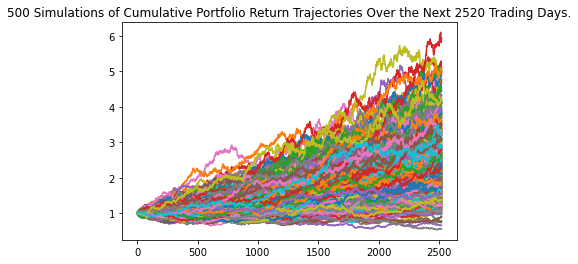

In [44]:
# Plot simulation outcomes
line_plot_2 = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot_2.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches="tight")

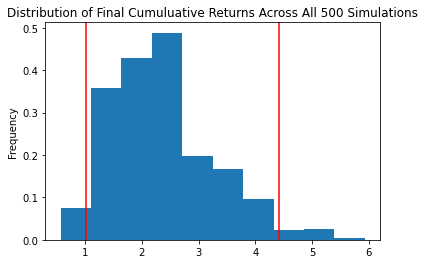

In [45]:
# Plot probability distribution and confidence intervals
dist_plot_2 = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot_2.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           500.000000
mean              2.359081
std               0.893019
min               0.566130
25%               1.695058
50%               2.249026
75%               2.831722
max               5.929816
95% CI Lower      1.019039
95% CI Upper      4.411812
Name: 2520, dtype: float64


In [47]:
#set initial investment
initial_investment_2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*60000,2)
ci_upper_ten = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $193075.16 and $2102361.28
